In [1]:
import polars as pl

In [8]:
cloudtrails_log_schema = {
    "eventVersion": pl.Utf8,
    "userIdentity": pl.Struct({
        "type": pl.Utf8,
        "principalId": pl.Utf8,
        "arn": pl.Utf8,
        "accountId": pl.Utf8,
        "invokedBy": pl.Utf8,
        "accesskeyId": pl.Utf8,
        "userName": pl.Utf8,
    }),
    "sessionContext": pl.Struct({
        "attributes": pl.Struct({
            "mfaAuthenticated": pl.Utf8,
            "creationDate": pl.Utf8,
        }),
        "sessionIssuer": pl.Struct({
            "type": pl.Utf8,
            "principalId": pl.Utf8,
            "arn": pl.Utf8,
            "accountId": pl.Utf8,
            "userName": pl.Utf8,
        }),
    }),
    "eventTime": pl.Utf8,
    "eventSource": pl.Utf8,
    "eventName": pl.Utf8,
    "awsRegion": pl.Utf8,
    "sourceIPAddress": pl.Utf8,
    "userAgent": pl.Utf8,
    "errorCode": pl.Utf8,
    "errorMessage": pl.Utf8,
    "requestParameters": pl.Utf8,
    "responseElements": pl.Utf8,
    "additionalEventData": pl.Utf8,
    "requestID": pl.Utf8,
    "eventID": pl.Utf8,
    "resources": pl.List(pl.Struct({
        "arn": pl.Utf8,
        "accountId": pl.Utf8,
        "type": pl.Utf8,
    })),
    "eventType": pl.Utf8,
    "apiVersion": pl.Utf8,
    "readOnly": pl.Utf8,
    "recipientAccountId": pl.Utf8,
    "serviceEventDetails": pl.Utf8,
    "sharedEventId": pl.Utf8,
    "vpcEndpointId": pl.Utf8,
}

In [9]:
dlp = pl.read_ndjson("../data/raw/flaws_cloudtrail00.ndjson", schema=cloudtrails_log_schema)

In [5]:
voc_eventName = pl.read_csv("../data/prepared/vocabularies/eventName.csv")
voc_eventSource = pl.read_csv("../data/prepared/vocabularies/eventSource.csv")
voc_eventType = pl.read_csv("../data/prepared/vocabularies/eventType.csv")
voc_userAgent = pl.read_csv("../data/prepared/vocabularies/userAgent.csv")

In [14]:
dlp_to_plot = dlp.join(voc_eventName, on="eventName")\
    .join(voc_eventSource, on="eventSource")\
    .join(voc_eventType, on="eventType")\
    .join(voc_userAgent, on="userAgent").select(
        "eventName-token", "eventSource-token", "eventType-token", "userAgent-token"
    )
dlp_to_plot.head()

eventName-token,eventSource-token,eventType-token,userAgent-token
i64,i64,i64,i64
344,48,1,5050
277,86,1,2580
439,86,1,2580
1017,86,1,2580
619,86,1,2580


In [16]:
dlp_to_plot.write_csv("../data/prepared/dlp_to_plot.csv")

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

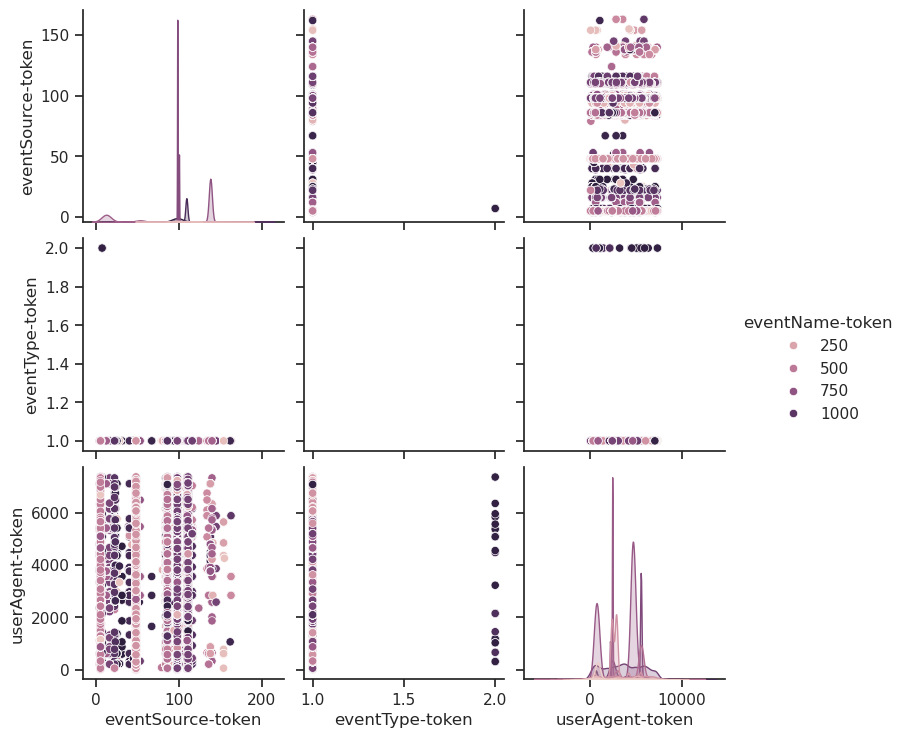

In [31]:
sns.pairplot(dlp_to_plot.to_pandas(), hue="eventName-token")

In [22]:
from sklearn import preprocessing

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(dlp_to_plot.to_numpy())

In [24]:
X_train_minmax

array([[0.2806874 , 0.27672956, 0.        , 0.68559011],
       [0.22585925, 0.51572327, 0.        , 0.35012902],
       [0.35842881, 0.51572327, 0.        , 0.35012902],
       ...,
       [0.57855974, 0.00628931, 0.        , 0.63126443],
       [0.38379705, 0.00628931, 0.        , 0.32894201],
       [0.71440262, 0.59119497, 0.        , 0.32894201]])

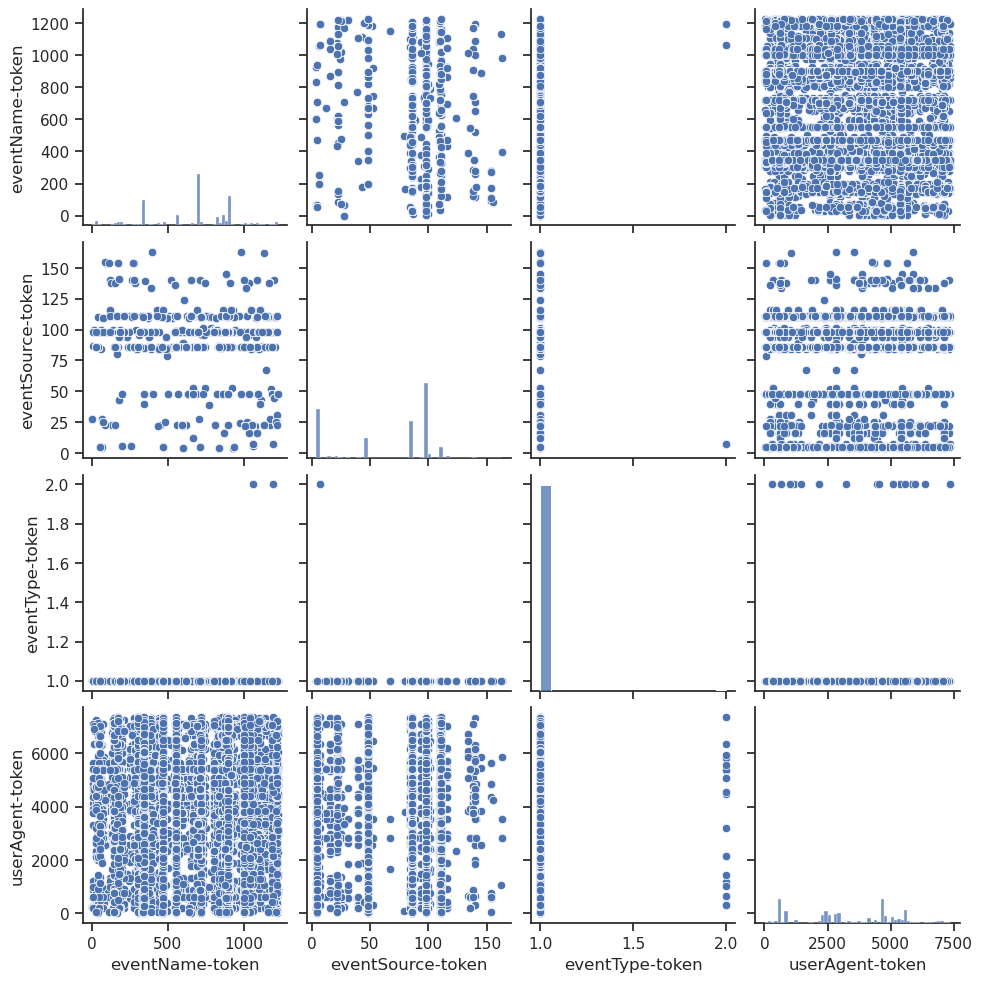

In [25]:
sns.pairplot(dlp_to_plot.to_pandas())

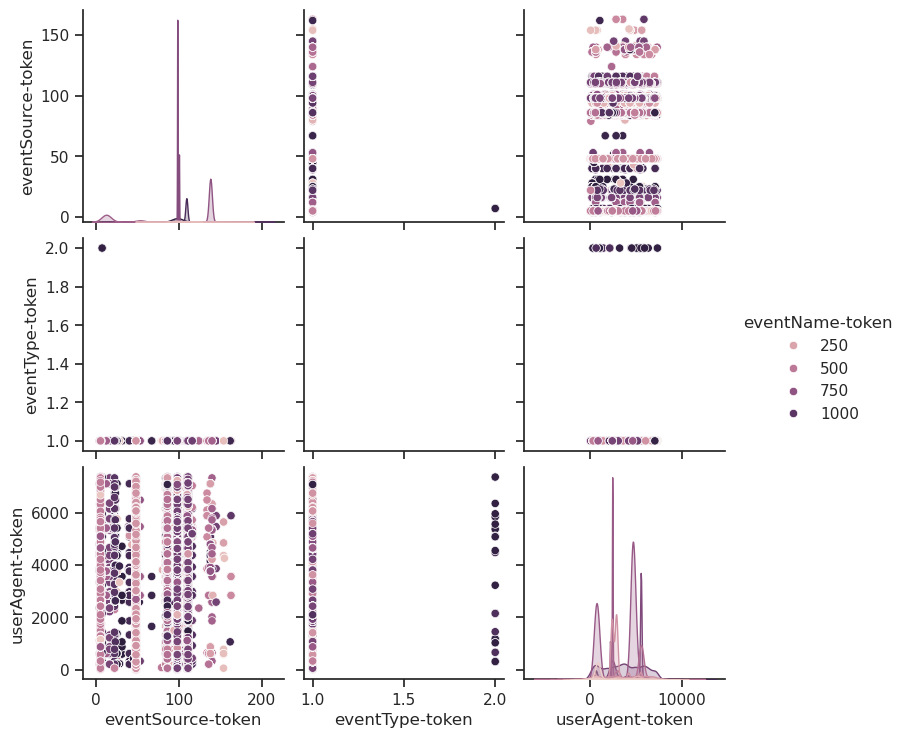

In [30]:
sns.pairplot(dlp_to_plot.to_pandas(), hue="eventName-token")

In [28]:
sns.lmplot(
    data=dlp_to_plot.to_pandas(), x="eventName-token", y="userAgent-token", col="eventName-token",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

ValueError: Image size of 800x76400 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7fe191d2e160> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 800x76400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 800x76400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x76400 with 382 Axes>